In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession\
       .builder\
       .appName("analysis")\
       .getOrCreate()

In [2]:
df = spark.read.json("hdfs://namenode:8020/tmp/data/covid")
df = df.withColumn("value", F.from_json("value",schema))\
.select("value.userID", "value.tweetText", "value.hashTags", "value.location_full_name",
        "value.favoriteCount", "value.reTweetCount", "value.created_at",)

In [3]:
df.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- favoriteCount: long (nullable = true)
 |-- hashTags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- location_coutry: string (nullable = true)
 |-- location_full_name: string (nullable = true)
 |-- reTweetCount: long (nullable = true)
 |-- tweetText: string (nullable = true)
 |-- userID: string (nullable = true)



In [4]:
df.show()

+--------------------+-------------+------------------+------------------+--------------------+------------+------------+------+
|          created_at|favoriteCount|          hashTags|   location_coutry|  location_full_name|reTweetCount|   tweetText|userID|
+--------------------+-------------+------------------+------------------+--------------------+------------+------------+------+
|Thu Aug 26 14:08:...|            1|[#COVID19, #Alpha]| location_coutry 1|location_full_name 1|           1| tweetText 1|     1|
|Thu Aug 01 14:08:...|            2| [#COVID19, #Beta]| location_coutry 2|location_full_name 2|           2| tweetText 2|     2|
|Thu Aug 02 14:08:...|            3|        [#COVID19]| location_coutry 3|location_full_name 3|           3| tweetText 3|     3|
|Thu Aug 03 14:08:...|            4|[#COVID19, #Alpha]| location_coutry 4|location_full_name 4|           4| tweetText 4|     4|
|Thu Aug 04 14:08:...|            5| [#COVID19, #Beta]| location_coutry 5|location_full_name 5|  

In [9]:
from pyspark.sql.functions import expr
rdd = df.selectExpr("hashTags", "(favoriteCount + reTweetCount * 2) as point").rdd

In [10]:
rddFlatMap = rdd.flatMap(lambda x: list(map(lambda y: (y, x.point), x.hashTags)))
rddReduce = rddFlatMap.reduceByKey(lambda a,b: a+b)

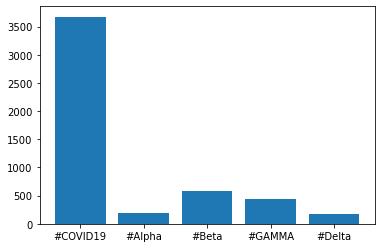

In [11]:
import matplotlib.pyplot as plt

cl = rddReduce.collect()
keys = []
values = []
for e in cl:
    keys.append(e[0])
    values.append(e[1])
plt.bar(keys, values, align='center')
plt.show()